<a href="https://colab.research.google.com/github/fannijako/ML_course_hws/blob/main/ML_hazi_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar100, mnist
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(train_data, _), (test_data, _) = mnist.load_data()
train_data = train_data.astype("float32") / 255
train_data = np.reshape(train_data, (len(train_data), 28, 28, 1))
test_data = test_data.astype("float32") / 255
train_data = np.reshape(test_data, (len(test_data), 28, 28, 1))

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
def noise(array):
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=array.shape)

    return np.clip(noisy_array, 0.0, 1.0)

In [4]:
def display(array1, array2):

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

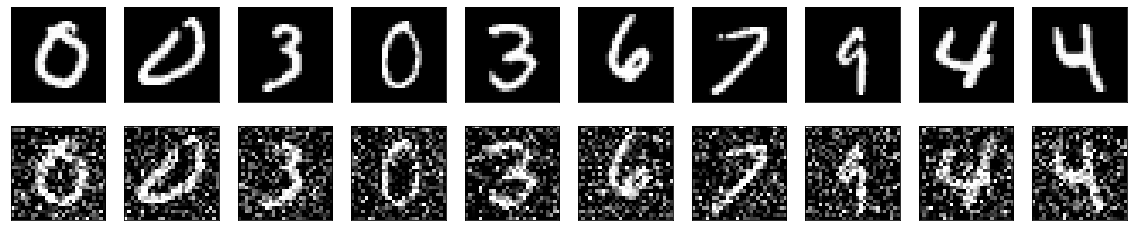

In [5]:
noisy_train = noise(train_data)
noisy_test = noise(test_data)
display(train_data, noisy_train)

In [6]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

In [7]:
autoencoder.fit(x=train_data, y=train_data, epochs=50, batch_size=128, shuffle=True, validation_data=(test_data, test_data),)

Epoch 1/50
79/79 [==============================] - 12s 22ms/step - loss: 0.4071 - val_loss: 0.1511
Epoch 2/50
79/79 [==============================] - 1s 12ms/step - loss: 0.1077 - val_loss: 0.0888
Epoch 3/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0840 - val_loss: 0.0802
Epoch 4/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0782 - val_loss: 0.0766
Epoch 5/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0754 - val_loss: 0.0745
Epoch 6/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0736 - val_loss: 0.0730
Epoch 7/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0725 - val_loss: 0.0722
Epoch 8/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0717 - val_loss: 0.0714
Epoch 9/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0710 - val_loss: 0.0706
Epoch 10/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0704 - val_loss: 0.0704
Epoch 11

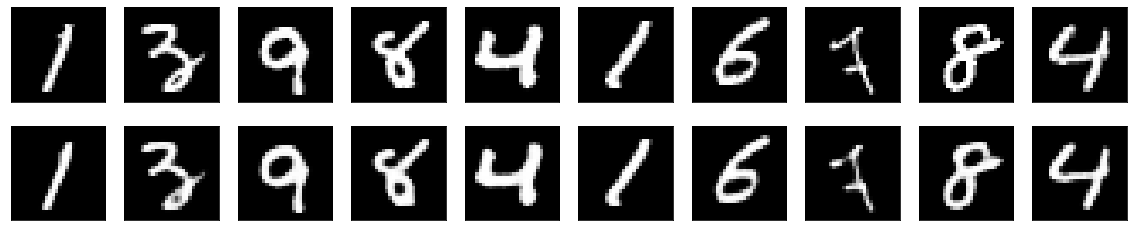

In [8]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [9]:
early_stopping_callback = EarlyStopping(patience=5, restore_best_weights=True)
autoencoder.fit(x=noisy_train, y=train_data, epochs=50, batch_size=128, shuffle=True, validation_data=(noisy_test, test_data), callbacks = [early_stopping_callback])

Epoch 1/50
79/79 [==============================] - 1s 14ms/step - loss: 0.1222 - val_loss: 0.1012
Epoch 2/50
79/79 [==============================] - 1s 16ms/step - loss: 0.0995 - val_loss: 0.0983
Epoch 3/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0975 - val_loss: 0.0969
Epoch 4/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0964 - val_loss: 0.0959
Epoch 5/50
79/79 [==============================] - 1s 16ms/step - loss: 0.0955 - val_loss: 0.0951
Epoch 6/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0948 - val_loss: 0.0946
Epoch 7/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0943 - val_loss: 0.0942
Epoch 8/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0938 - val_loss: 0.0939
Epoch 9/50
79/79 [==============================] - 1s 16ms/step - loss: 0.0934 - val_loss: 0.0933
Epoch 10/50
79/79 [==============================] - 1s 12ms/step - loss: 0.0930 - val_loss: 0.0928
Epoch 11/

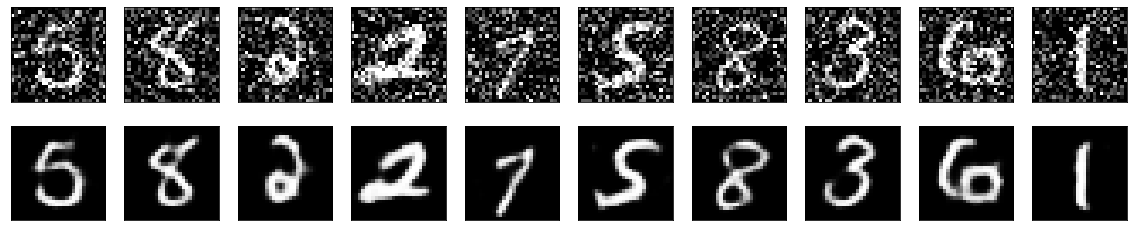

In [10]:
predictions = autoencoder.predict(noisy_test)
display(noisy_test, predictions)